In [35]:
## Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Loading DataSet

df = pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
## Checking for null values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
## Changing yes to 1 and no to 0 in the Extracurricular Activities column
df['Extracurricular Activities'] = np.where(df['Extracurricular Activities']=='Yes',1,0)


In [6]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


### EDA

In [8]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [9]:
avg_score1 = df['Previous Scores'].mean()
avg_score2 = df['Performance Index'].mean()

<BarContainer object of 2 artists>

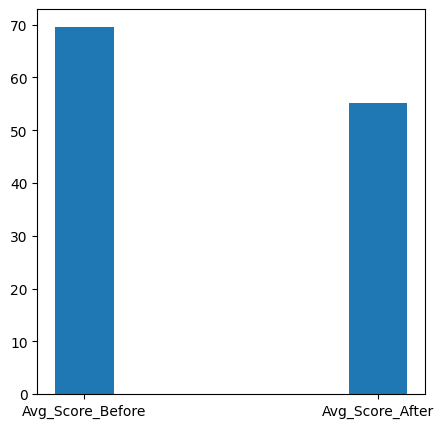

In [10]:
## Average Score in first and second test
plt.figure(figsize=(5,5))
plt.bar(['Avg_Score_Before','Avg_Score_After'],[avg_score1,avg_score2],width=0.2)

The Mean Score of the previous test was more than the current test.

In [11]:
## Average Sleep Hours
avg_sleep_hours = df['Sleep Hours'].mean()
avg_sleep_hours

np.float64(6.5306)

The mean sleep hours of the students are approx 6.5 hours.

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

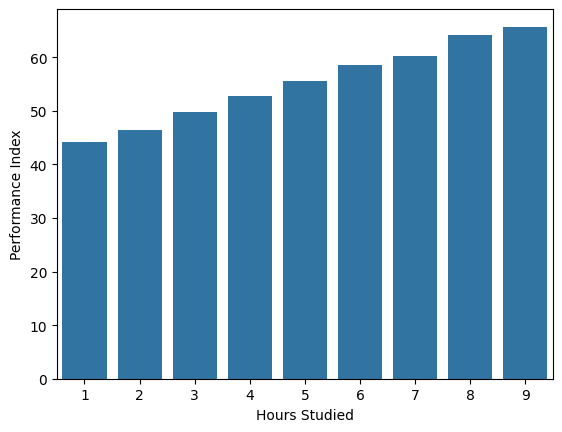

In [12]:
## Avg Performance Score on the basis of number of hours studied
avg_scores = df.groupby('Hours Studied')['Performance Index'].mean()
sns.barplot(data = avg_scores)

This shows that the marks scored increases with the increase in number of hours studied.

In [13]:
## Correlation
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


<Axes: >

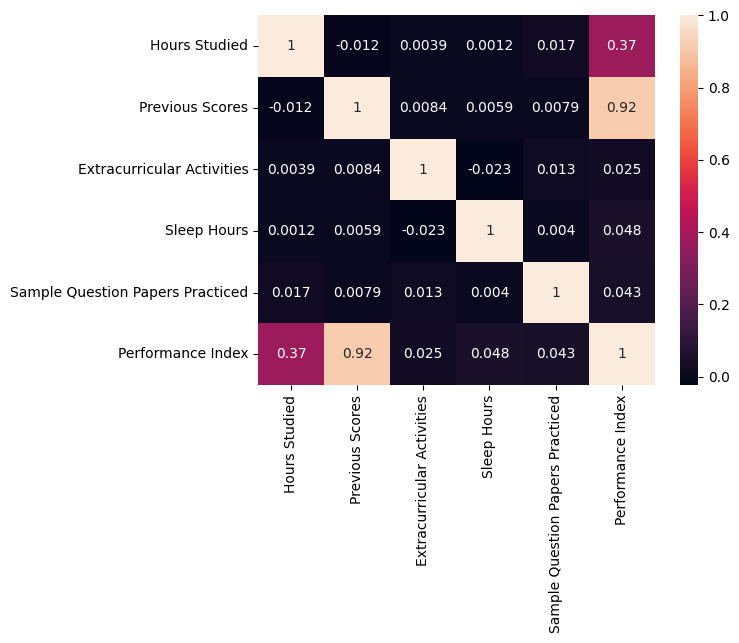

In [14]:
## Visualization

sns.heatmap(df.corr(),annot=True)

The performance index has a strong positive correlation with the previous scores and Hours Studied.
Whereas it is not much correlated with Extracurricular Activities, Sleep Hours and Sample Question Paper Solved.
So we can delete these columns when training our model.

### MODEL TRAINING

In [15]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [16]:
## Independent and Dependent Featues
x = df.drop('Performance Index',axis=1)
y = df['Performance Index']

In [17]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [18]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [19]:
## Train Test Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)


In [20]:
x_train.shape,x_test.shape

((7500, 5), (2500, 5))

In [21]:
## Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
x_train_scaled

array([[ 0.00835013,  0.54061982,  1.02129332, -1.48859903,  0.49179436],
       [-0.76006675, -0.95609155,  1.02129332, -0.31530359,  0.84009065],
       [-1.14427519, -0.32286751,  1.02129332, -0.31530359,  1.53668324],
       ...,
       [ 1.54518389, -1.70444723,  1.02129332,  1.44463956,  0.14349807],
       [ 0.77676701, -1.07122319, -0.97915063,  0.85799184, -0.9013908 ],
       [ 0.00835013, -1.53174976, -0.97915063,  0.27134412,  1.53668324]],
      shape=(7500, 5))

In [23]:
x_test_scaled

array([[ 0.77676701, -0.8409599 , -0.97915063, -1.48859903, -0.55309451],
       [ 1.54518389,  1.63437044,  1.02129332,  0.27134412, -0.20479822],
       [-1.52848363, -0.72582826,  1.02129332, -0.31530359, -1.24968709],
       ...,
       [ 1.16097545, -0.95609155,  1.02129332,  0.27134412, -0.20479822],
       [-0.76006675, -1.30148648, -0.97915063,  0.27134412, -0.55309451],
       [ 1.16097545, -0.78339408, -0.97915063, -0.90195131, -0.20479822]],
      shape=(2500, 5))

In [24]:
## Model Training

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [25]:
## Model Analysis: Performance Metrix

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred = regressor.predict(x_test_scaled)
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("The r2 Score is:",score)
print("The mae and mse are:",mae,mse)

The r2 Score is: 0.988829509896184
The mae and mse are: 1.6035485216824026 4.079597122946045


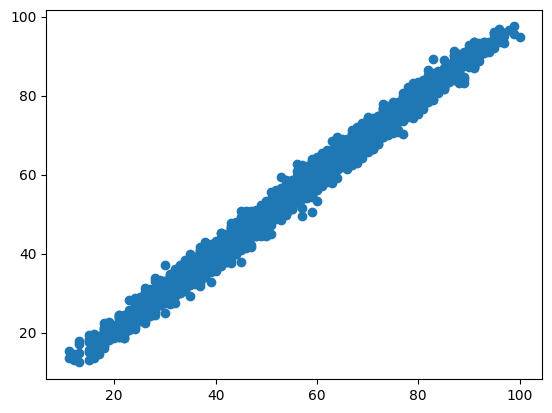

In [26]:
plt.scatter(y_test,y_pred)

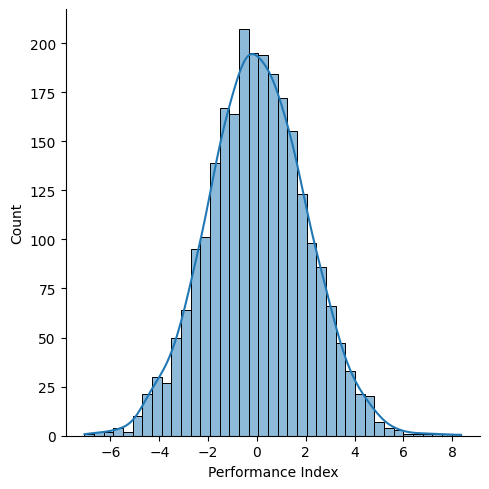

In [ ]:
residuals = y_test - y_pred
sns.displot(residuals,kde=True)

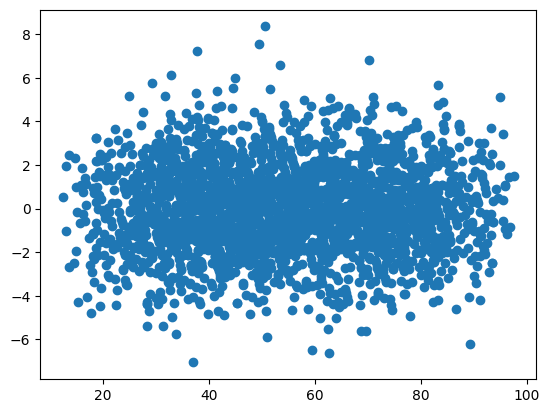

In [28]:
plt.scatter(y_pred,residuals)

In [36]:
### Using ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)


Ridge()

In [37]:
## Model Analysis: Performance Metrix

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred = ridge.predict(x_test_scaled)
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("The r2 Score is:",score)
print("The mae and mse are:",mae,mse)

The r2 Score is: 0.9888291134040088
The mae and mse are: 1.6035459278180162 4.079741926649581


In [38]:
## Using lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)

Lasso()

In [39]:
## Model Analysis: Performance Metrix

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred = lasso.predict(x_test_scaled)
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("The r2 Score is:",score)
print("The mae and mse are:",mae,mse)

The r2 Score is: 0.9807147347263495
The mae and mse are: 2.101388876188157 7.043210458488202


In [40]:
## Using elasticNet regression
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet()
elasticNet.fit(x_train_scaled,y_train) 

ElasticNet()

In [41]:
## Model Analysis: Performance Metrix

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred = elasticNet.predict(x_test_scaled)
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("The r2 Score is:",score)
print("The mae and mse are:",mae,mse)

The r2 Score is: 0.8598971150499064
The mae and mse are: 5.974452999984179 51.16725596163311


Since we get the best accuracy from the ridge model so we can use that for prediction.

In [42]:
## Using pickle to dump the models
import pickle
pickle.dump(ridge,open('ridge.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))